In [91]:
# Run first to install requirements
!pip install -r requirements.txt

# Run this to speed up the data scraping process
!unzip -oq new_data.zip

In [3]:
from amazon_new_data_scraping import parallel_scrape_amazon_product_info, load_all_data_as_dataframe
import pandas as pd

df_amazon_food_reviews = pd.read_csv('amazon_food_reviews.csv', converters={
    "Time": lambda x: pd.to_datetime(int(x), unit="s")  # 如果是秒
})

In [2]:
product_id_list = list(df_amazon_food_reviews.ProductId.unique())
print(f"Total number of products: {len(product_id_list)}")
print("Start scraping data...")
parallel_scrape_amazon_product_info(product_id_list, replace=False)
print("Scraping finished.")

Total number of products: 4322
Start scraping data...
Using 12 CPU cores for parallel scraping


Scraping amazon products: 100%|██████████| 4322/4322 [00:01<00:00, 4287.96it/s]

Successfully scraped 4322/4322 products
Scraping finished.


In [87]:
df_amazon_food_reviews

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,350,B00067AD4U,A2LYOWC3FC73XK,"Michael Ekstrum """"expresso bean fan""""",1,1,5,2007-05-12,excellent - exactly what I expected,The product was exactly as advertised and fres...
1,439,B000G6RYNE,A926YP1BSD72Y,Shopper11,0,0,5,2011-11-20,Best gluten-free dairy-free chips,These are my favorite gluten-free dairy-free f...
2,446,B000G6RYNE,A19G8B2QYETD7W,NyahNyah,0,0,3,2011-02-13,Heavy on the Vinegar,"I usually love Kettle Chips, and love salt & v..."
3,448,B000G6RYNE,ACFPHOYVB71V4,karob,0,0,5,2010-12-18,BEST BUY in BBQ Chips,Tried many varieties of BBQ chips and hands do...
4,452,B000G6RYNE,A2MUGFV2TDQ47K,"Lynrie """"Oh HELL no""""",0,0,3,2010-11-05,An Acquired Taste,"OK,I did read the reviews which ranged from sp..."
...,...,...,...,...,...,...,...,...,...,...
10823,567410,B000G6Q4FI,A1KSQOZY8AFWUJ,Paul,0,0,5,2007-07-12,One of the healthier chips,"Simple, uncomplicated and healthy ingredients...."
10824,567415,B000G6Q4FI,A1SG2JGJ8ZOR69,Nish P.,0,2,3,2010-11-11,Meh...,"The Buffalo Bleu flavor isn't that great, at l..."
10825,567416,B000G6Q4FI,A1INLQGL1U8EDF,H.L.,0,2,5,2008-01-14,Kettle Chips,We were very pleased to find that Kettle Chips...
10826,568096,B000EICISA,AZCH2U6NJMUSG,"J. Poling """"mrfxmanis""""",4,4,5,2012-01-30,American Recipe For This,This is a very good product but i had problems...


In [90]:
df_amazon_food_reviews.pivot_table(index=['UserId'], values=['ProductId'], aggfunc='count').sort_values(
    "ProductId", ascending=False)

,ProductId
UserId,
A281NPSIMI1C2R,17
A1YUL9PCJR3JTY,16
A3OXHLG6DIBRW8,11
AJD41FBJD9010,11
A2OWR2PL3DLWS4,10
...,...
A2BPBHC8ZSELQ9,1
A2BPGIPXP0N9ON,1
A2BQWHZQ297351,1


In [85]:
df_amazon_product_info = load_all_data_as_dataframe()
df_amazon_product_info

100%|██████████| 4322/4322 [00:00<00:00, 7717.29it/s]


,product_id,product_title,byline_info,product_description,category,alt_images,product_detail,important_information,rating,top_comments
0,B0007GFDP4,Korean Seaweed 0.17oz5gea-4 Packs,Brand: JN,Freshness Guaranteed Premium Seaweed Winter Ha...,"[Grocery & Gourmet Food, Pantry Staples, Cooki...",[https://m.media-amazon.com/images/I/51uDkERYg...,{'Product Dimensions': '6.1 x 3.35 x 2.3 inche...,{'Ingredients': 'Seaweed. non gmo com oil. non...,"{'score': '3.8 out of 5', 'dist': {'5 star': '...","[{'date': 'March 22, 2013', 'title': 'Best Tas..."
1,B000EMEEHE,GIN GINS Original Ginger Chews by The Ginger P...,Visit the The Ginger People Store,Deliciously spicy-sweet chewy ginger candies m...,"[Grocery & Gourmet Food, Snacks & Sweets, Cand...",[https://m.media-amazon.com/images/I/41KQy5H4V...,"{'Is Discontinued By Manufacturer': 'No', 'Pro...",{'Safety Information': 'Made in a facility tha...,"{'score': '3.2 out of 5', 'dist': {'5 star': '...","[{'date': 'July 9, 2014', 'title': 'Truly Life..."
2,B000E671W0,"Celestial Seasonings Peppermint Herbal Tea, Ca...",Visit the Celestial Seasonings Store,Nothing is more soothing than a cup of your fa...,"[Grocery & Gourmet Food, Beverages, Tea, Fruit...",[https://m.media-amazon.com/images/I/61iWD7RnS...,"{'Is Discontinued By Manufacturer': 'No', 'Pro...",{'Safety Information': 'This product is labell...,"{'score': '4.8 out of 5', 'dist': {'5 star': '...","[{'date': 'August 3, 2025', 'title': 'DELICIOU..."
3,B000084E76,"Kookamunga Krazee Kitty Catnip Bubbles, 5 oz",Visit the KOOKAMUNGA Store,Make your cats go wild with this fun product. ...,"[Pet Supplies, Cats, Toys, Catnip Toys]",[https://m.media-amazon.com/images/I/4124SxrG1...,"{'Is Discontinued By Manufacturer': 'No', 'Pro...",{},"{'score': '3.2 out of 5', 'dist': {'5 star': '...","[{'date': 'July 17, 2015', 'title': 'My cat is..."
4,B0009TQC90,Golden Dragon - Finest Chrysanthemum Pu Erh Te...,Brand: Golden Dragon,a specially selected of buds and young leaves ...,"[Grocery & Gourmet Food, Beverages, Tea, Black]",[https://m.media-amazon.com/images/I/51hGQNcQz...,"{'Is Discontinued By Manufacturer': 'No', 'Pac...",{'Legal Disclaimer': 'Statements regarding die...,"{'score': '3.2 out of 5', 'dist': {'5 star': '...","[{'date': 'January 7, 2012', 'title': 'Not exa..."
...,...,...,...,...,...,...,...,...,...,...
3376,B0006VB3WC,Katz-n-Flocken All Life Stages Cat Food - 15 lbs,Visit the Solid Gold Store,"Ideal for adult cats and kittens, to maintain ...","[Pet Supplies, Cats, Food]",[https://m.media-amazon.com/images/I/517dkgAGm...,"{'Is Discontinued By Manufacturer': 'No', 'Pro...",{},"{'score': '4.4 out of 5', 'dist': {'5 star': '...","[{'date': 'November 25, 2011', 'title': 'Katz-..."
3377,B0001PB99K,Maker's Mark Bourbon Flavored Gourmet Cherries...,,,"[Grocery & Gourmet Food, Pantry Staples, Canne...",[https://m.media-amazon.com/images/I/31CDQM754...,"{'Is Discontinued By Manufacturer': 'No', 'UPC...",{'Legal Disclaimer': 'Statements regarding die...,"{'score': '4 out of 5', 'dist': {'5 star': '0%...",[]
3378,B000EDDSES,"Bob's Red Mill Old Country Style Muesli, 18oz ...",Visit the Bob's Red Mill Store,Product Description Old Country Style Muesli...,"[Grocery & Gourmet Food, Breakfast Cereal, Mue...",[https://m.media-amazon.com/images/I/411xsw6he...,"{'Is Discontinued By Manufacturer': 'No', 'Pro...","{'Ingredients': 'Whole Grain Wheat, Dates, Sun...","{'score': '4.8 out of 5', 'dist': {'5 star': '...","[{'date': 'October 17, 2011', 'title': 'I Love..."
3379,B00004RBDW,TERRO T380 Outdoor Reusable Fly Magnet Fly Tra...,Visit the Terro Store,Flies are an ever-present nuisance around home...,"[Patio, Lawn & Garden, Pest Control, Traps]",[https://m.media-amazon.com/images/I/41ecsqa4Z...,{},{},"{'score': '4.2 out of 5', 'dist': {'5 star': '...","[{'date': 'July 22, 2025', 'title': 'It works!..."


In [ ]:
df_amazon_product_info

In [86]:
p = df_amazon_food_reviews.pivot_table(index=['ProductId'], aggfunc='count')[["Summary"]]
p[p.Summary > 1]

,Summary
ProductId,
6641040,3
7310172001,19
7310172101,16
B00002N8SM,3
B00004CI84,23
...,...
B000GZY8FC,4
B000GZY8W0,2
B000GZY942,2


In [11]:
import time
from datetime import datetime

In [27]:
from glob import glob
from tqdm import tqdm
import json
import numpy as np

In [28]:
df_amazon_product_info['CountAltImages'] = df_amazon_product_info.alt_images.apply(lambda x: len(x))
df_amazon_product_info['Score'] = df_amazon_product_info.rating.apply(lambda x: float(x['score'].split(' ')[0]) if x is not None else np.nan)

<Axes: xlabel='CountAltImages', ylabel='Score'>

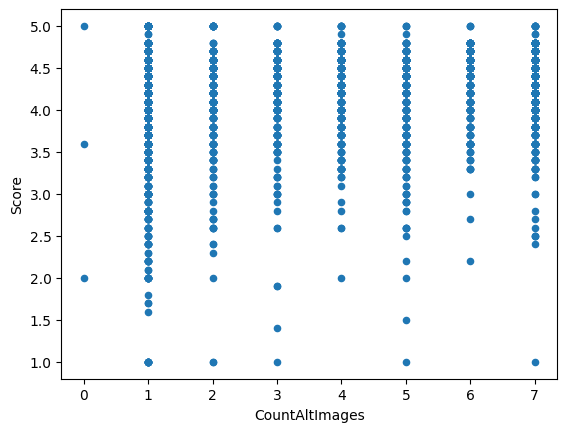

In [29]:
df_amazon_product_info.plot.scatter(x='CountAltImages', y='Score')

<Axes: xlabel='n_images'>

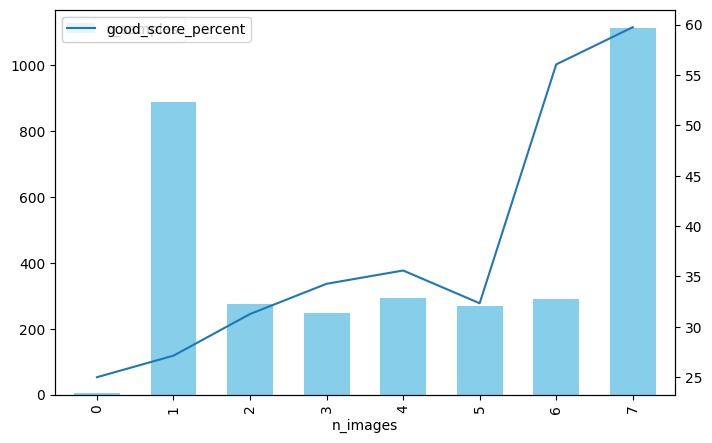

In [79]:
data = []
for n in range(8):
    tmp = df_amazon_product_info[df_amazon_product_info.CountAltImages==n]#.Score.hist(bins=50)
    data.append({'n_images':n, 'good_score_percent':len(tmp[tmp.Score > 4.4]) / len(tmp) * 100, 'n_samples':len(tmp)})

df = pd.DataFrame(data)
ax = df.plot(x='n_images', y='n_samples', kind="bar", color="skyblue", width=0.6, figsize=(8,5))
df.plot(x='n_images', y=['good_score_percent'], ax=ax.twinx())

<Axes: xlabel='n_images'>

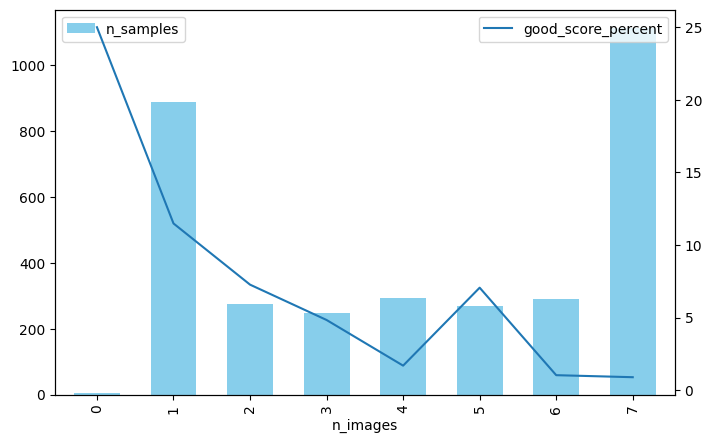

In [84]:
data = []
for n in range(8):
    tmp = df_amazon_product_info[df_amazon_product_info.CountAltImages==n]#.Score.hist(bins=50)
    data.append({'n_images':n, 'good_score_percent':len(tmp[tmp.Score <= 3]) / len(tmp) * 100, 'n_samples':len(tmp)})

df = pd.DataFrame(data)
ax = df.plot(x='n_images', y='n_samples', kind="bar", color="skyblue", width=0.6, figsize=(8,5))
df.plot(x='n_images', y=['good_score_percent'], ax=ax.twinx())